In [4]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from pykat import finesse
from pykat.commands import *
from IPython.display import display, HTML

%matplotlib inline

                                              ..-
    PyKat 1.1.297         _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



In [5]:
kat1 = finesse.kat()
kat1.verbose = False

In [32]:
code = """
# Ex2b.kat 
# Simple cavity, PDH signal in reflection.
# Optimize demodulation phase
#
# P. Fulda 2013.06.17
######################################################


# interferometer parts
l laser 1 0 nlaser
s laser2EOM 1 nlaser nEOMin
mod EOM 9M 0.1 1 pm nEOMin nEOMtrans
s EOM2BS 1 nEOMtrans nBSin
bs BSpickoff 0.5 0.5 0 45 nBSin dump nBStrans nBSreturn
s BS2ITM 1 nBStrans nITMin
m ITM 0.99 0.01 0 nITMin nITMtrans
s cavityspace 1 nITMtrans nETMin
m ETM 0.99 0.01 0 nETMin nETMtrans
s BS2PDHPD 1 nBSreturn nPDHPD

# detectors
pd1 PDHPD 9M 0 nPDHPD
#diff ETM phi

xaxis ETM phi lin -10 10 1000
#xaxis PDHPD phase lin -180 180 1000
"""

## What does this 10 degrees of phase detuning equate to in length?

In [33]:
kat1.parse(code)
out = kat1.run()

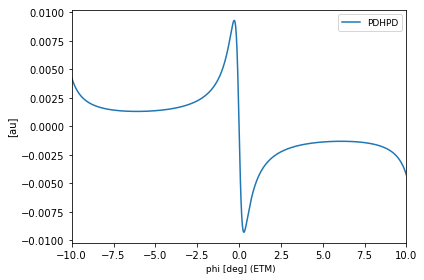

In [34]:
fig = out.plot()

In [30]:
x = out.x
y = out.y

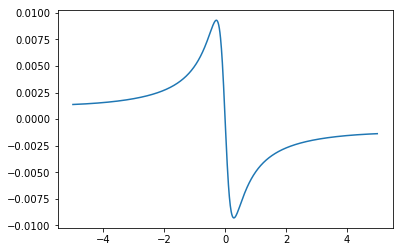

In [31]:
plt.plot(x,y)